In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
df=pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')
print(df.shape)
print(df.describe())
print(df.info())
print(df.isna().sum())

(162758, 5)
                                            movieid     reviewerName  \
count                                        162758           162758   
unique                                        16812             4482   
top     escape_the_terminator_tyler_durden_astonish  Sherri Morrison   
freq                                            708              962   

       isFrequentReviewer               reviewText sentiment  
count              162758                   156311    162758  
unique                  2                   155071         2  
top                 False  Parental Content Review  POSITIVE  
freq               113189                       29    108761  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   movieid             162758 non-null  object
 1   reviewerName        162758 non-null  object
 2   i

In [3]:
df.isnull().sum()

movieid                  0
reviewerName             0
isFrequentReviewer       0
reviewText            6447
sentiment                0
dtype: int64

In [4]:

df_train=pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')
df_movies=pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv')

df=pd.merge(df_train,df_movies,on='movieid')
df
print(df['sentiment'].value_counts())
df
cols=df.columns

POSITIVE    350583
NEGATIVE    174694
Name: sentiment, dtype: int64


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
## to check percentagr of nan values in each feature

df
nan_counts = df.isna().sum()

for column, count in nan_counts.items():
    print(column,'  ',count/df.shape[0])


movieid    0.0
reviewerName    0.0
isFrequentReviewer    0.0
reviewText    0.04534179109308041
sentiment    0.0
title    0.0
audienceScore    0.5727054487441864
rating    0.7439712761076537
ratingContents    0.7439712761076537
releaseDateTheaters    0.6528955198876022
releaseDateStreaming    0.5251400689540947
runtimeMinutes    0.4239439381507281
genre    0.41374931702701623
originalLanguage    0.41969284777365085
director    0.0
boxOffice    0.7238390411154496
distributor    0.6769609177633896
soundType    0.7918088932125336


In [7]:
## the columns being removed have a large % of nan values
columns_to_drop=['boxOffice','distributor','soundType','releaseDateTheaters','releaseDateStreaming']
df=df.drop(columns=columns_to_drop)
df.shape


(525277, 13)

In [8]:
## binary classification problem, so encode sentiment with 0 and 1
le=LabelEncoder()
df['sentiment']=le.fit_transform(df['sentiment'])
## 1-> positive   0->negative


/tmp/ipykernel_32/1837556904.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
/tmp/ipykernel_32/1837556904.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)


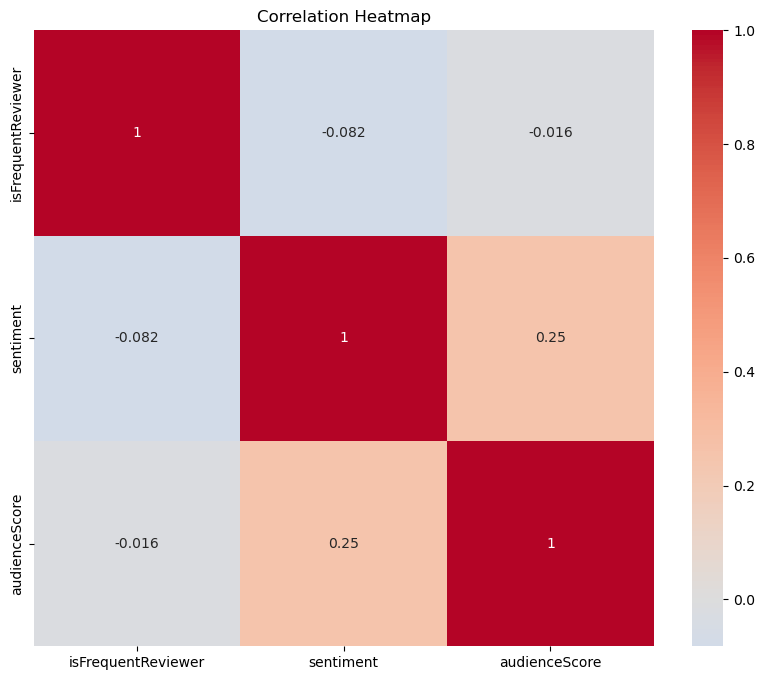

In [9]:
df.corr()

## we find only audienceScore has some correlation with sentiment while other numerical columns have correlation close to 0. So we will drop them

cols_to_drop=['runtimeMinutes']
df=df.drop(columns=cols_to_drop)
df

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()



**Data Visualization**

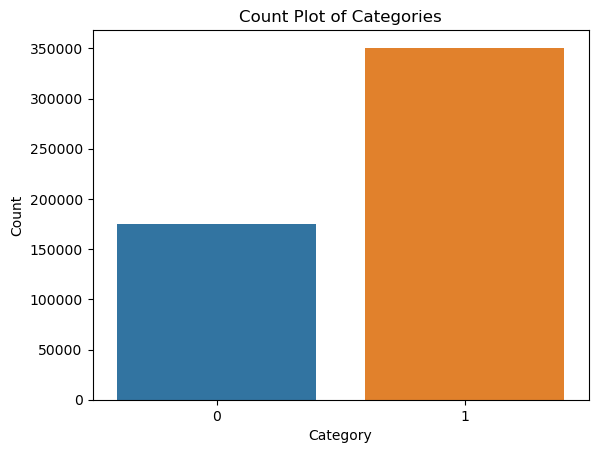

In [10]:



# no of movies classified as positive/negative

sns.countplot(x='sentiment',data=df)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count Plot of Categories')

# Show the plot
plt.show()

In [11]:
#dropping originalLanguage
cols_to_drop=['originalLanguage']
df=df.drop(columns=cols_to_drop)

# dropping title, since movieid is representative of it
cols_to_drop=['title']
df=df.drop(columns=cols_to_drop)

df

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,audienceScore,rating,ratingContents,genre,director
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,1,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...","Comedy, Animation, Adventure, Fantasy",Bennie Basso
1,marvelous_pirate,Sharon Foster,False,&#91;T&#93;he haphazard way this story is asse...,0,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...","Comedy, Animation, Adventure, Fantasy",Bennie Basso
2,marvelous_pirate,Melinda Dunn,False,The stop-motion artistry of Wendell &amp; Wild...,1,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...","Comedy, Animation, Adventure, Fantasy",Bennie Basso
3,marvelous_pirate,Mr. Wayne Smith,False,Wendell &amp; Wild is narratively overstuffed ...,0,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...","Comedy, Animation, Adventure, Fantasy",Bennie Basso
4,marvelous_pirate,Connor Nelson,False,For being about the Netherworlds&#44; it&#8217...,1,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...","Comedy, Animation, Adventure, Fantasy",Bennie Basso
...,...,...,...,...,...,...,...,...,...,...
525272,frodo_baggins_norman_bates_ellen_ripley_astonish,Janice Pearson,False,The broad shape of the ending is predictable; ...,0,81.0,NaN,NaN,"Crime, Drama",Sara Maggard
525273,elegant_starlight_labyrinth_katniss_everdeen,Frank Farrell,False,A formula designed for adolescent and young ad...,1,75.0,NaN,NaN,"Horror, Mystery & thriller",Frances Gagne
525274,don_vito_corleone_neo_hannibal_lecter,Juan Taylor,False,"All these years, I've kept a soft spot in my h...",0,55.0,NaN,NaN,Comedy,Claudia Bernhard
525275,dorothy_gale_luke_skywalker_luke_skywalker,Robert Cardenas,False,Powerful documentary about the struggle of Wes...,1,75.0,NaN,NaN,Documentary,James Fanney


In [12]:
# Data Imputation



from sklearn.impute import SimpleImputer
si_cat=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
si_num=SimpleImputer(missing_values=np.nan,strategy='mean')

nc=df.select_dtypes(include=['float64','int64']).columns
cc=df.select_dtypes(include=['object']).columns



df_num=pd.DataFrame(si_num.fit_transform(df[nc]),columns=nc)
df_num
df_cat=pd.DataFrame(si_cat.fit_transform(df[cc]),columns=cc)

new_df=pd.concat([df_cat,df_num],axis=1)
new_df


,movieid,reviewerName,reviewText,rating,ratingContents,genre,director,sentiment,audienceScore
0,marvelous_pirate,Benjamin Henry,Henry Selick’s first movie since 2009’s Corali...,PG-13,"['Violence', 'Brief Strong Language', 'Substan...","Comedy, Animation, Adventure, Fantasy",Bennie Basso,1.0,65.0
1,marvelous_pirate,Sharon Foster,&#91;T&#93;he haphazard way this story is asse...,PG-13,"['Violence', 'Brief Strong Language', 'Substan...","Comedy, Animation, Adventure, Fantasy",Bennie Basso,0.0,65.0
2,marvelous_pirate,Melinda Dunn,The stop-motion artistry of Wendell &amp; Wild...,PG-13,"['Violence', 'Brief Strong Language', 'Substan...","Comedy, Animation, Adventure, Fantasy",Bennie Basso,1.0,65.0
3,marvelous_pirate,Mr. Wayne Smith,Wendell &amp; Wild is narratively overstuffed ...,PG-13,"['Violence', 'Brief Strong Language', 'Substan...","Comedy, Animation, Adventure, Fantasy",Bennie Basso,0.0,65.0
4,marvelous_pirate,Connor Nelson,For being about the Netherworlds&#44; it&#8217...,PG-13,"['Violence', 'Brief Strong Language', 'Substan...","Comedy, Animation, Adventure, Fantasy",Bennie Basso,1.0,65.0
...,...,...,...,...,...,...,...,...,...
525272,frodo_baggins_norman_bates_ellen_ripley_astonish,Janice Pearson,The broad shape of the ending is predictable; ...,R,['Language'],"Crime, Drama",Sara Maggard,0.0,81.0
525273,elegant_starlight_labyrinth_katniss_everdeen,Frank Farrell,A formula designed for adolescent and young ad...,R,['Language'],"Horror, Mystery & thriller",Frances Gagne,1.0,75.0
525274,don_vito_corleone_neo_hannibal_lecter,Juan Taylor,"All these years, I've kept a soft spot in my h...",R,['Language'],Comedy,Claudia Bernhard,0.0,55.0
525275,dorothy_gale_luke_skywalker_luke_skywalker,Robert Cardenas,Powerful documentary about the struggle of Wes...,R,['Language'],Documentary,James Fanney,1.0,75.0


In [13]:
## text data to numerical data

## tf-idf vectorization for reviewtext,genre,rating contents


import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

import string

temp=new_df

temp['combinedText']=temp['reviewText']+temp['genre']+temp['ratingContents'].apply(lambda x: ' '.join(x))

temp=temp.drop(columns=['genre','reviewText','ratingContents'])



def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    
    
    return text

temp['combinedText'] = temp['combinedText'].apply(preprocess_text)



In [14]:
from sklearn.preprocessing import OrdinalEncoder
X_text=temp['combinedText']
Y=temp['sentiment']
cat_features_one=['movieid','rating','director','reviewerName']
ordinal_encoder=OrdinalEncoder()
X_categorical=ordinal_encoder.fit_transform(temp[cat_features_one])

X_categorical


temp['movieid']=X_categorical[:,0]
temp['rating']=X_categorical[:,1]
temp['director']=X_categorical[:,2]
temp['reviewerName']=X_categorical[:,3]
temp

,movieid,reviewerName,rating,director,sentiment,audienceScore,combinedText
0,10191.0,457.0,2.0,983.0,1.0,65.0,henry selick’s first movie since 2009’s corali...
1,10191.0,3860.0,2.0,983.0,0.0,65.0,91t93he haphazard way this story is assembled ...
2,10191.0,2980.0,2.0,983.0,1.0,65.0,the stopmotion artistry of wendell amp wild is...
3,10191.0,3199.0,2.0,983.0,0.0,65.0,wendell amp wild is narratively overstuffed pa...
4,10191.0,962.0,2.0,983.0,1.0,65.0,for being about the netherworlds44 it8217s ver...
...,...,...,...,...,...,...,...
525272,4871.0,1812.0,3.0,11134.0,0.0,81.0,the broad shape of the ending is predictable b...
525273,2928.0,1529.0,3.0,4113.0,1.0,75.0,a formula designed for adolescent and young ad...
525274,2101.0,2234.0,3.0,2184.0,0.0,55.0,all these years ive kept a soft spot in my hea...
525275,2343.0,3595.0,3.0,5206.0,1.0,75.0,powerful documentary about the struggle of wes...


In [15]:
exp=temp

X_text=exp['combinedText']
y = exp["sentiment"]
X_numeric = exp.drop(columns=["sentiment", "combinedText"])
X_text_train, X_text_test, X_numeric_train, X_numeric_test, y_train, y_test = train_test_split(
    X_text, X_numeric, y, test_size=55315, random_state=42
)


In [16]:
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform on the training text data
X_text_train_tfidf = tfidf_vectorizer.fit_transform(X_text_train)

# Transform the testing text data
X_text_test_tfidf = tfidf_vectorizer.transform(X_text_test)


In [17]:
from scipy.sparse import hstack

X_train = hstack((X_text_train_tfidf, X_numeric_train))
X_test = hstack((X_text_test_tfidf, X_numeric_test))



In [18]:
# dc=DummyClassifier(strategy="most_frequent")
# dc.fit(X_train,y_train)
# predictions=dc.predict(X_test)
# x=dc.score(X_train,y_train)
# print(len(predictions))
# print(x)

In [19]:
## Logistic regression

logreg_model = LogisticRegression(solver='saga')

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logreg_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6654976046280394


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [20]:
# ## logistic regression with hpt
# from sklearn.model_selection import train_test_split, GridSearchCV
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'penalty': ['l1', 'l2'],
#     'solver': ['liblinear']
# }


# logreg_model = LogisticRegression()

# # Initialize GridSearchCV with Logistic Regression and the hyperparameter grid
# grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy')

# # Fit the GridSearchCV on the training data
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters from the search
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Get the best estimator (model)
# best_model = grid_search.best_estimator_

# # Make predictions on the testing data using the best model
# y_pred = best_model.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

In [21]:
# KNN algorithm




# from sklearn.neighbors import KNeighborsClassifier

# knn_model = KNeighborsClassifier(n_neighbors=3, weights='uniform')

# # Fit the model on the training data
# knn_model.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = knn_model.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

In [22]:
# KNN with HPT





# from sklearn.neighbors import KNeighborsClassifier

# knn_model = KNeighborsClassifier()

# param_dist = {
#     'n_neighbors': np.arange(1, 11),
#     'weights': ['uniform', 'distance']
# }
# # Initialize RandomizedSearchCV with KNN and the hyperparameter distributions
# random_search = RandomizedSearchCV(knn_model, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42)

# # Fit the RandomizedSearchCV on the training data
# random_search.fit(X_train, y_train)

# # Get the best hyperparameters from the search
# best_params = random_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Get the best estimator (model)
# best_model = random_search.best_estimator_

# # Make predictions on the testing data using the best model
# y_pred = best_model.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

In [23]:
# from sklearn.model_selection import train_test_split
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import accuracy_score


# # Create the MLPClassifier
# mlp = MLPClassifier(hidden_layer_sizes=(50,), activation='tanh', solver='adam', random_state=42)

# # Train the model
# mlp.fit(X_train, y_train)

# # Make predictions
# y_pred_mlp = mlp.predict(X_test)

# # Evaluate the model's performance
# accuracy = accuracy_score(y_test, y_pred_mlp)
# print("MLP Accuracy:", accuracy)


In [24]:
## MLP with HPT

# import numpy as np
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import classification_report
# param_grid = {
#     'hidden_layer_sizes': [(100,), (50, 50), (30, 30, 30)],
#     'activation': ['logistic', 'relu'],
#     'solver': ['adam', 'sgd'],
#     'learning_rate': ['constant', 'adaptive'],
#     'max_iter': [200, 400, 600]
# }
# mlp_model = MLPClassifier(random_state=42)
# grid_search = GridSearchCV(mlp_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train, y_train)
# best_mlp_model = grid_search.best_estimator_
# y_pred = best_mlp_model.predict(X_test)
# report = classification_report(y_test, y_pred)
# print(report)


In [25]:
# ## cart

# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score


# model = DecisionTreeClassifier()
# model.fit(X_train, y_train)
# y_pred_cart = model.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred_cart)
# print("Accuracy:", accuracy)

# from sklearn.metrics  classification_report
# class_report = classification_report(y_test, y_pred_cart)
# print("Classification Report: CART \n", class_report)

In [26]:
## ada boost

# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.metrics import classification_report
# base_estimator = DecisionTreeClassifier(max_depth=1)  # You can adjust this as needed
# n_estimators = 50  # Number of boosting iterations

# adaboost_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n_estimators, random_state=42)
# adaboost_model.fit(X_train, y_train)
# y_pred = adaboost_model.predict(X_test)
# report = classification_report(y_test, y_pred)
# print(report)


In [27]:
## svm




# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report
# svm_model = SVC(kernel='linear', C=1.0)  # You can use other kernels as well
# svm_model.fit(X_train, y_train)
# y_pred_svm = svm_model.predict(X_test)
# report = classification_report(y_test, y_pred)
# print(report)



In [28]:
## svm with hyper parameter tuning





# from sklearn.model_selection import  RandomizedSearchCV

# param_dist = {
#     'C': reciprocal(0.1, 100),
#     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
#     'gamma': ['scale', 'auto'] + list(np.logspace(-5, 2, num=8))
# }
# svm_model = SVC()
# random_search = RandomizedSearchCV(svm_model, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1)
# random_search.fit(X_train, y_train)
# best_svm_model = random_search.best_estimator_
# y_pred = best_svm_model.predict(X_test)
# report = classification_report(y_test, y_pred)
# print(report)


In [29]:
predictions=list(y_pred)
for i in range(len(predictions)):
    if predictions[i]==1:
        predictions[i]='POSITIVE'
    else:
        predictions[i]='NEGATIVE'

                                                   
submit=pd.DataFrame(columns=['id','sentiment'])
submit['id']=[i for i in range(len(predictions))]
submit['sentiment']=predictions
submit.to_csv("submission.csv",index=False)

In [30]:
from sklearn.metrics import accuracy_score, classification_report
class_report = classification_report(y_test, y_pred)
print("Classification Report: Logistic Regression\n", class_report)

Classification Report: Logistic Regression
               precision    recall  f1-score   support

         0.0       0.46      0.02      0.04     18440
         1.0       0.67      0.99      0.80     36875

    accuracy                           0.67     55315
   macro avg       0.56      0.50      0.42     55315
weighted avg       0.60      0.67      0.54     55315



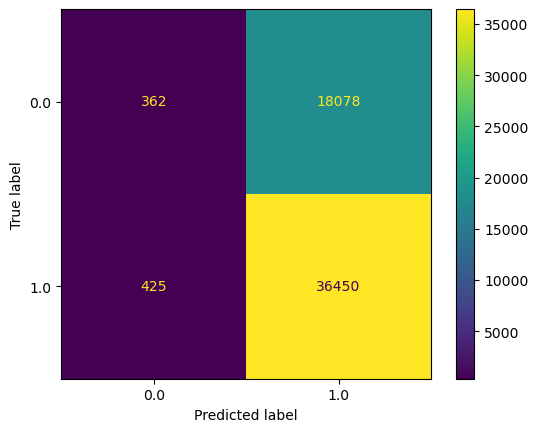

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg_model.classes_)
disp
disp.plot()
plt.show()

[0.684709   0.69619612 0.66558334 ... 0.68367361 0.70106197 0.68126379]
0.5867915879260267


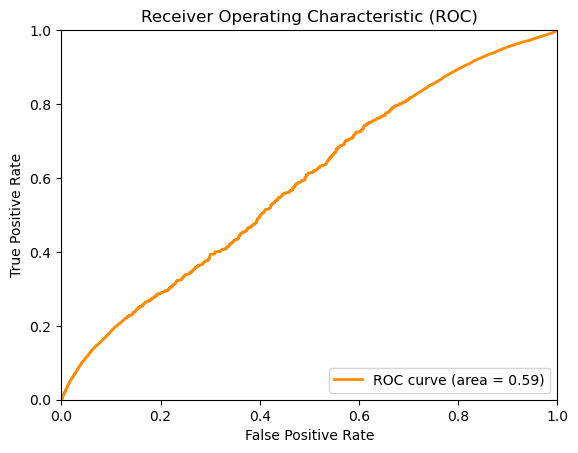

In [32]:
## ROC Curve
from sklearn.metrics import roc_curve, auc
y_prob = logreg_model.predict_proba(X_test)[:,1]
print(y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
